In [1]:
import os
os.chdir('/Users/marianneaubin/Documents/Classes/CS6742/Cornell-Conversational-Analysis-Toolkit')
import convokit
from convokit import Corpus, Parser, ComplexityTransformer, LengthTracker, SelfTracker, Transformer
import nltk
import matplotlib.pyplot as plt

In [2]:
iq2 = convokit.Corpus(filename='datasets/reddit_coarse_discourse-corpus/corpus')

In [3]:
complexity_transformer = ComplexityTransformer()
self_transformer = SelfTracker()
length_transformer = LengthTracker()

In [4]:
iq2 = complexity_transformer.transform(iq2)
print("complexity transformer done")
iq2 = self_transformer.transform(iq2)
print("self transformer done")
iq2 = length_transformer.transform(iq2)
print("length transformer done")

complexity transformer done
self transformer done
length transformer done


In [41]:
# all_conv_complexity : ((utterance complexity, # self words, length data) list) list
# for the coarse discourse dataset, we need to change for and against to a poster
all_conv_complexity = []
for conv_id in iq2.conversations:
    conv = iq2.get_conversation(conv_id)
    conversation_data = []
    for utt in conv.iter_utterances():
        if utt.text != None:
            conversation_data.append((utt.meta["complexity"], utt.meta["num_self_invocations"], utt.meta["length_tracker"]))
    all_conv_complexity.append(conversation_data)

In [42]:
flesch_kincaid_percentages = [] # all conversations have a list of tuples, each tuple is ((for or against) utterance's flesch-kincaid complexity, % through convo)
self_percentages = []       # all conversations have a list of tuples where each tuple is (utterance's # of self references, % through convo)

for conv_data in all_conv_complexity:
    flk = []
    me = []
    for utt in conv_data:
        flk.append((utt[0]["flesch_kincaid"], utt[2][1]))
        me.append((utt[1], utt[2][1]))
    flesch_kincaid_percentages.append(flk)
    self_percentages.append(me)
    
for conv_data in for_complexity:
    flk = []
    for utt in conv_data:
        flk.append((utt[0]["flesch_kincaid"], utt[2][1]))
    for_fk_percentages.append(flk)
    
for conv_data in against_complexity:
    flk = []
    for utt in conv_data:
        flk.append((utt[0]["flesch_kincaid"], utt[2][1]))
    against_fk_percentages.append(flk)

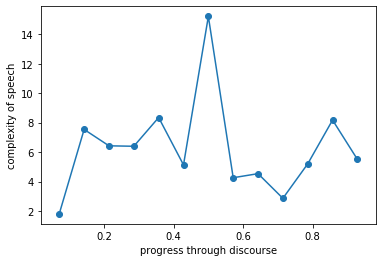

In [103]:
i = 410
percentages = [x[1] for x in flesch_kincaid_percentages[i]]
complexities = [x[0] for x in flesch_kincaid_percentages[i]]
plt.scatter(percentages, complexities)
plt.plot(percentages, complexities)
plt.xlabel("progress through discourse")
plt.ylabel("complexity of speech")
plt.show()

Text(0.5, 0, 'progress through thread')

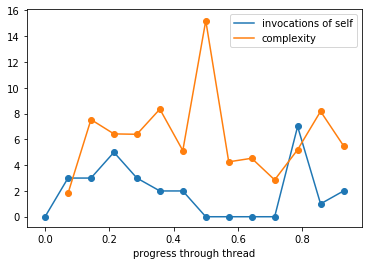

In [104]:
me_percentages = [x[1] for x in self_percentages[i]]
me_number_of_invocations = [x[0] for x in self_percentages[i]]
fk_percentages = [x[1] for x in flesch_kincaid_percentages[i]]
fk_complexities = [x[0] for x in flesch_kincaid_percentages[i]]
plt.scatter(me_percentages, me_number_of_invocations)
plt.plot(me_percentages, me_number_of_invocations)
plt.scatter(fk_percentages, fk_complexities)
plt.plot(fk_percentages, fk_complexities)
plt.legend(["invocations of self", "complexity"])
plt.xlabel("progress through thread")

9086
9086


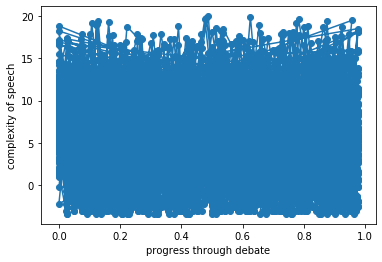

In [135]:
percentages = []
complexities = []

counter = 0
for i, data in enumerate(flesch_kincaid_percentages):
    if len(data) > 20:
        for j, cell in enumerate(flesch_kincaid_percentages[i]):
            if cell[0] != None:
                if cell[0] < 20:
                    percentages.append(cell[1])
                    complexities.append(cell[0])
        counter = counter + 1;
    if counter == 300:
        break
        
print(len(percentages))
print(len(complexities))

plt.scatter(percentages, complexities)
plt.plot(percentages, complexities)
plt.xlabel("progress through debate")
plt.ylabel("complexity of speech")
plt.show()